# Weighted Average
#### Because skip cycle is more like walk cycle than jump, it is reasonable to add more weight to walk shapelet while warping the shapelets

In [1]:
import pandas as pd
from fastdtw import fastdtw
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt

In [3]:
from Barycenter_DTW import resample_sequence
from ExtractShapelets import vector_accer, find_represt_shapelet

In [13]:
# Use %store to retrieve the variable
%store -r z_jump_rs
%store -r z_walk_rs
%store -r z_skip
%store -r z_skip_rs

%store -r g_jump_rs
%store -r g_walk_rs
%store -r g_skip
%store -r g_skip_rs

In [8]:
# Function to calculate the Weighted DTW
def weighted_dtw(df1, df2, df1_weight, df2_weight):
    # Resample the longer sequence to the length of the shorter one
    max_length = max(len(df1), len(df2))
    df1_resampled = pd.DataFrame({col: resample_sequence(df1[col].values, max_length) for col in df1.columns})
    df2_resampled = pd.DataFrame({col: resample_sequence(df2[col].values, max_length) for col in df2.columns})

    # Use the alignment path to calculate the barycenter sequence
    barycenter_seq = df1_resampled.values * df1_weight + df2_resampled.values * df2_weight
    barycenter_seq /= 2

    # Convert the barycenter sequence back to DataFrame
    barycenter_df = pd.DataFrame(barycenter_seq, columns=df1.columns)

    return barycenter_df


## Find best weight for candidate 1

In [20]:
def find_weight(walk_shapelet, jump_shapelet):
    """
    This is a method to add weight to weight and jump
    """
    best_weight = [0, 0] # use a list to store (weight1, weight2)
    start_value = 0
    end_value = 10
    step = 0.1
    weight_1 = [current_value for current_value in np.arange(start_value, end_value + step, step)]
    weight_2 = [current_value for current_value in np.arange(start_value, end_value + step, step)]
    weighted_distance = []
    min_dist = 100
    for weight1 in weight_1:
        for weight2 in weight_2:
            weighted_df = weighted_dtw(walk_shapelet, jump_shapelet, weight1, weight2)
            # Distance Comparison
            distance, path = fastdtw(weighted_df, pd.DataFrame(z_skip_rs))
            weighted_distance.append(distance)
            if (distance < min_dist):
                min_dist = distance
                best_weight[0] = weight1
                best_weight[1] = weight2
    return min_dist, best_weight


In [21]:
z_min_dist, z_best_weight = find_weight(pd.DataFrame(z_walk_rs), pd.concat([pd.DataFrame(z_jump_rs), pd.DataFrame(z_jump_rs)], ignore_index=True))

In [23]:
print('Best weight is :', z_best_weight)
print('Its distance is :', z_min_dist)

Best weight is : [0.5, 1.0]
Its distance is : 19.09361850020912


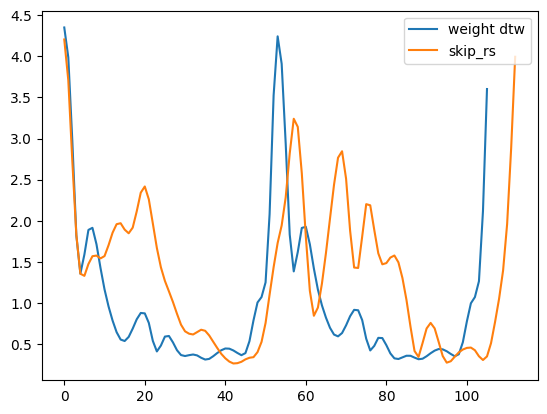

In [41]:
z_weighted = weighted_dtw(pd.DataFrame(z_walk_rs), pd.concat([pd.DataFrame(z_jump_rs), pd.DataFrame(z_jump_rs)], ignore_index=True), 0.5, 1)
plt.plot(z_weighted, label='weight dtw')
plt.plot(z_skip_rs, label='skip_rs')
plt.legend()
plt.show()

### Use the calculate weight to candidate 2 to see the result

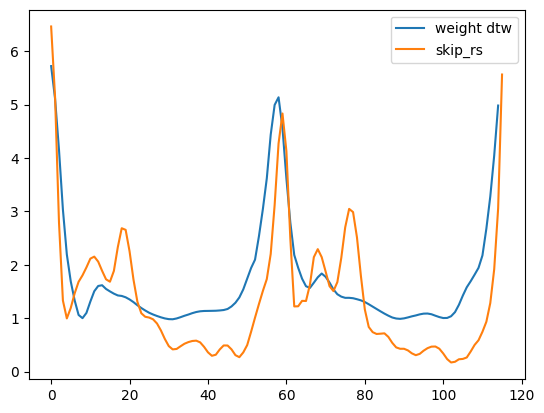

In [48]:
g_weighted = weighted_dtw(pd.DataFrame(g_walk_rs), pd.concat([pd.DataFrame(g_jump_rs), pd.DataFrame(g_jump_rs)], ignore_index=True), 2, 1)
distance, path = fastdtw(g_weighted, pd.DataFrame(g_skip_rs))
plt.plot(g_weighted, label='weight dtw')
plt.plot(g_skip_rs, label='skip_rs')
plt.legend()
plt.show()

In [ ]:
g_min_dist, g_best_weight = find_weight(pd.DataFrame(g_walk_rs), pd.concat([pd.DataFrame(g_jump_rs), pd.DataFrame(g_jump_rs)], ignore_index=True))
print('Best weight is :', g_best_weight)
print('Its distance is :', g_min_dist)

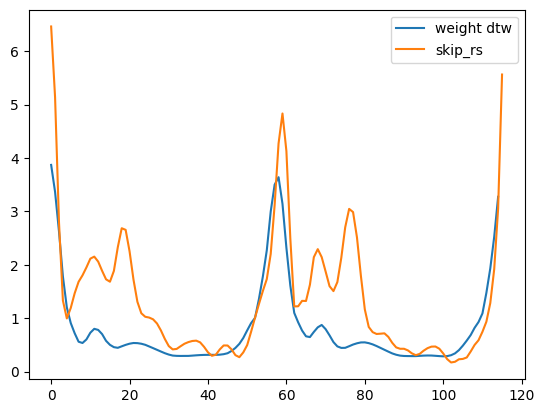

In [43]:
g_weighted = weighted_dtw(pd.DataFrame(g_walk_rs), pd.concat([pd.DataFrame(g_jump_rs), pd.DataFrame(g_jump_rs)], ignore_index=True), 0.4, 0.9)
distance, path = fastdtw(g_weighted, pd.DataFrame(g_skip_rs))
plt.plot(g_weighted, label='weight dtw')
plt.plot(g_skip_rs, label='skip_rs')
plt.legend()
plt.show()